In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [3]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor,Pool,cv

Plot_Visuals=1


In [4]:
row_train=[]
with open('/kaggle/input/playground-series-s4e12/train.csv','r') as file:
    reader=csv.DictReader(file)
    for row in reader:
        row_train.append(row)

row_test=[]
with open('/kaggle/input/playground-series-s4e12/test.csv','r') as file:
    reader=csv.DictReader(file)
    for row in reader:
        row_test.append(row)

train_original=pd.DataFrame(row_train)
test_original=pd.DataFrame(row_test)




In [5]:
train_original.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.59876067181393,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,,15.569730989408043,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.17754928786464,Suburban,...,1.0,14.0,,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,,10.938144158664583,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376093627736925,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
columns_to_convert=['id','Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration','Premium Amount']
columns_to_convert_test=['id','Age','Annual Income','Number of Dependents','Health Score','Previous Claims','Vehicle Age','Credit Score','Insurance Duration']

train_original['Policy Start Date']=pd.to_datetime(train_original['Policy Start Date'])
test_original['Policy Start Date']=pd.to_datetime(test_original['Policy Start Date'])

train_original['PS_year']=train_original['Policy Start Date'].dt.year
train_original['PS_month']=train_original['Policy Start Date'].dt.month
train_original['PS_day']=train_original['Policy Start Date'].dt.day
test_original['PS_year']=test_original['Policy Start Date'].dt.year
test_original['PS_month']=test_original['Policy Start Date'].dt.month
test_original['PS_day']=test_original['Policy Start Date'].dt.day

train_original = train_original.drop(columns=['Policy Start Date'])
test_original = test_original.drop(columns=['Policy Start Date'])

In [12]:
train_original['Premium Amount'] = pd.to_numeric(train_original['Premium Amount'], errors='coerce')


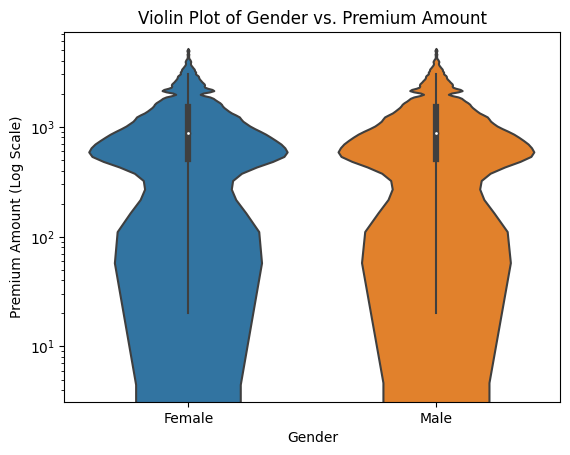

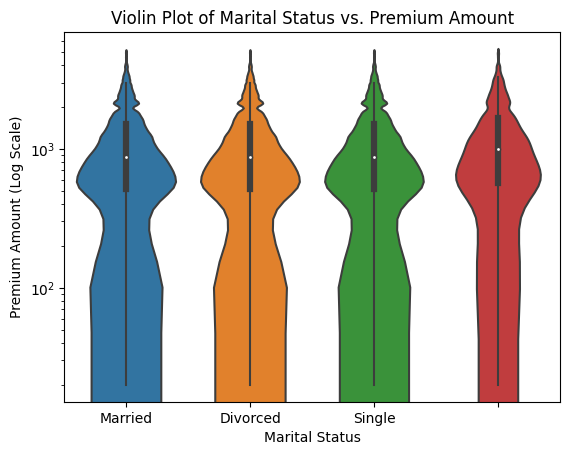

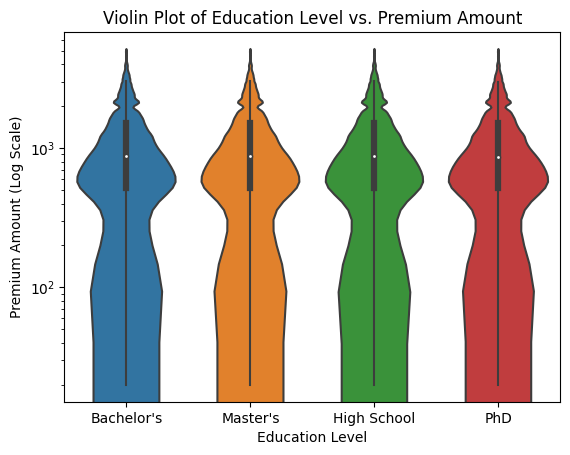

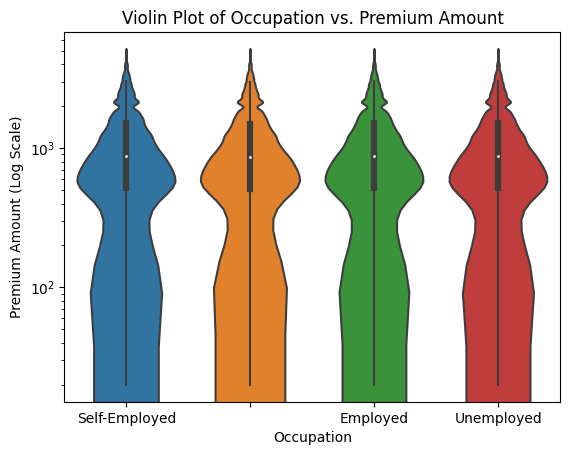

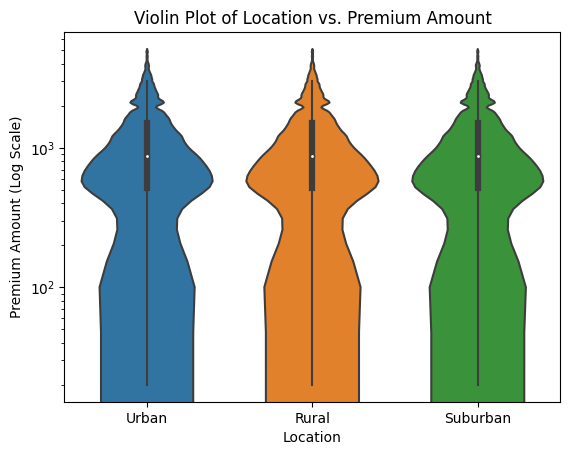

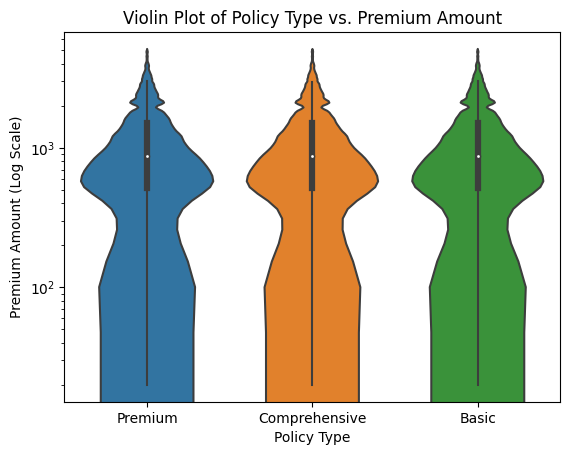

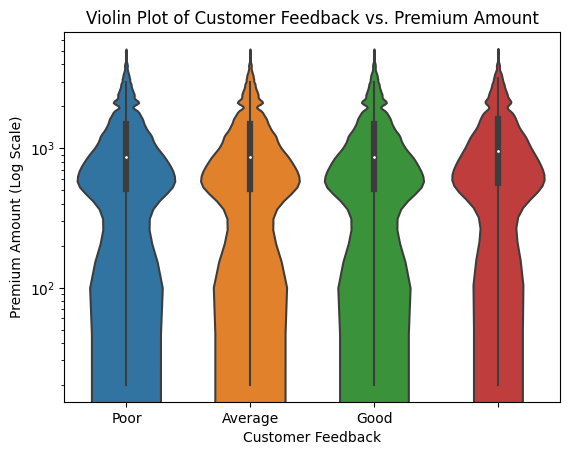

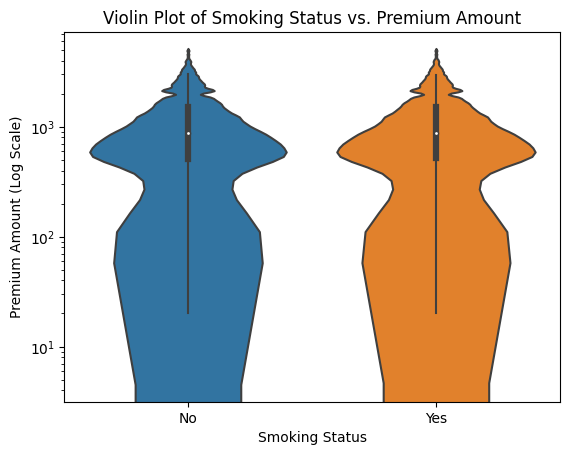

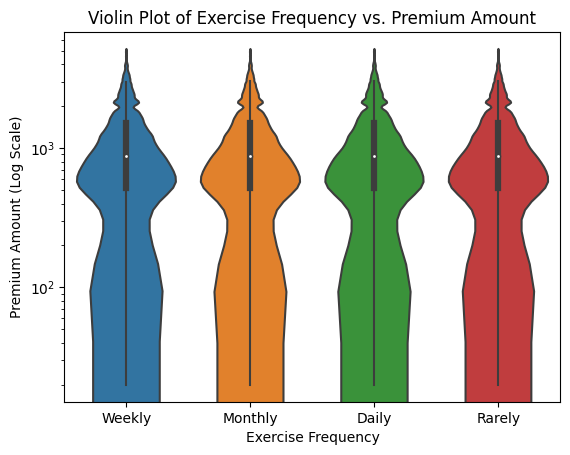

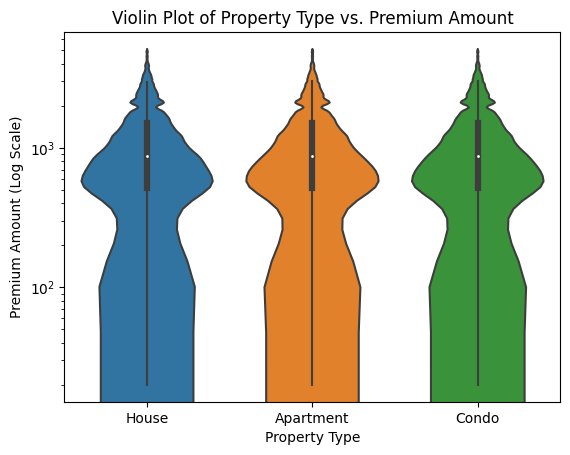

In [13]:
    sns.violinplot(x='Gender', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Gender vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Marital Status"
    sns.violinplot(x='Marital Status', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Marital Status vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Education Level"
    sns.violinplot(x='Education Level', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Education Level vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Occupation"
    sns.violinplot(x='Occupation', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Occupation vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Location"
    sns.violinplot(x='Location', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Location vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Policy Type"
    sns.violinplot(x='Policy Type', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Policy Type vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Customer Feedback"
    sns.violinplot(x='Customer Feedback', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Customer Feedback vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Smoking Status"
    sns.violinplot(x='Smoking Status', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Smoking Status vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Exercise Frequency"
    sns.violinplot(x='Exercise Frequency', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Exercise Frequency vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()
    # Violin plot showing distribution and density of "Premium Amount" for each "Propert Type"
    sns.violinplot(x='Property Type', y='Premium Amount', data=train_original)
    plt.yscale('log')
    plt.title("Violin Plot of Property Type vs. Premium Amount")
    plt.ylabel("Premium Amount (Log Scale)")
    plt.show()

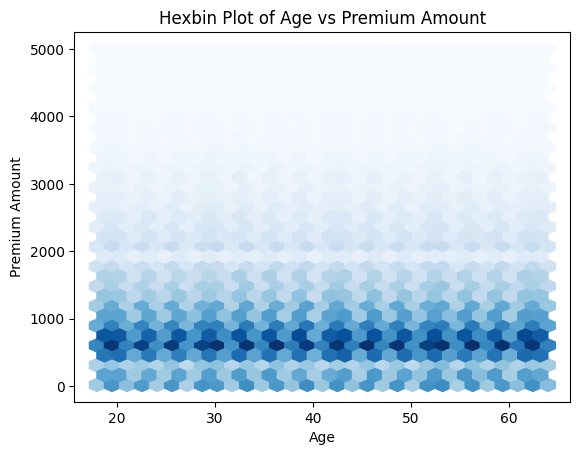

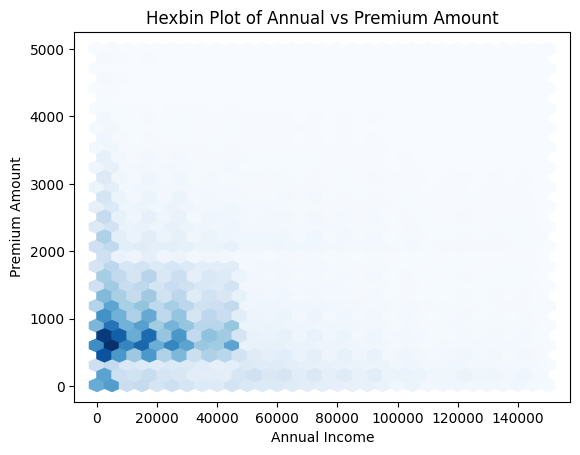

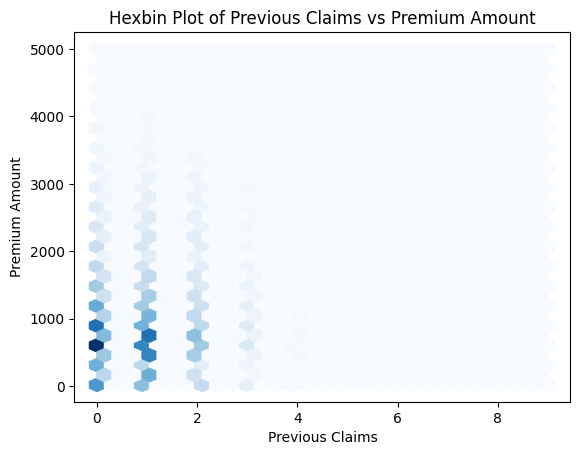

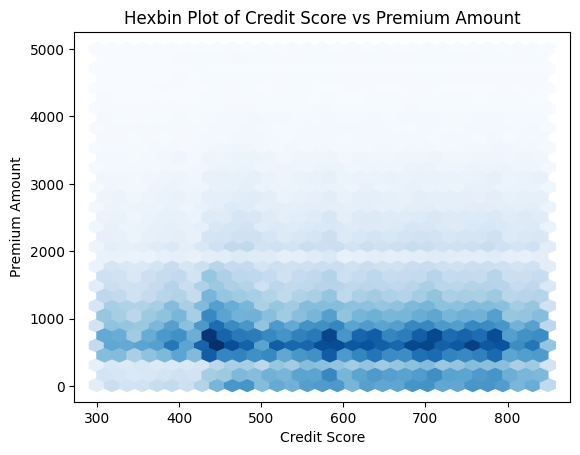

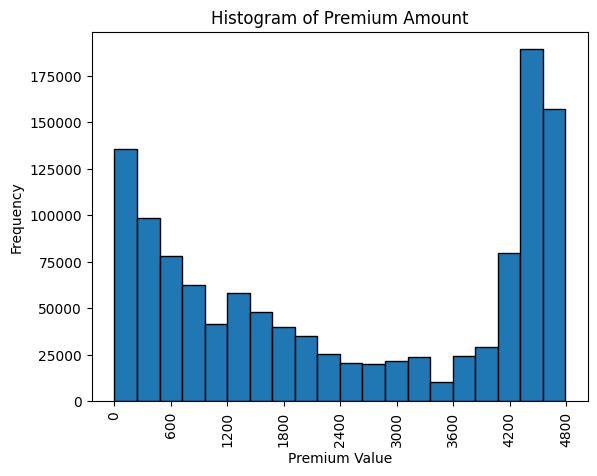

In [9]:

    # Hexbin plot of Age vs. Premium Amount
    plt.hexbin(
    x=pd.to_numeric(train_original['Age'], errors='coerce'),
    y=pd.to_numeric(train_original['Premium Amount'], errors='coerce'),
    cmap="Blues", gridsize=30
    )
    plt.title('Hexbin Plot of Age vs Premium Amount')
    plt.xlabel('Age')
    plt.ylabel('Premium Amount')
    plt.show()
    # Hexbin plot of Annual Income vs. Premium Amount
    plt.hexbin(
    x=pd.to_numeric(train_original['Annual Income'], errors='coerce'),
    y=pd.to_numeric(train_original['Premium Amount'], errors='coerce'),
    cmap="Blues", gridsize=30
    )
    plt.title('Hexbin Plot of Annual vs Premium Amount')
    plt.xlabel('Annual Income')
    plt.ylabel('Premium Amount')
    plt.show()
    # Hexbin plot of Previous Claims vs. Premium Amount
    plt.hexbin(
        x=pd.to_numeric(train_original['Previous Claims'], errors='coerce'),
        y=pd.to_numeric(train_original['Premium Amount'], errors='coerce'),
        cmap="Blues", gridsize=30
        )
    plt.title('Hexbin Plot of Previous Claims vs Premium Amount')
    plt.xlabel('Previous Claims')
    plt.ylabel('Premium Amount')
    plt.show()
    # Hexbin plot of Credit Score vs. Premium Amount
    plt.hexbin(
        x=pd.to_numeric(train_original['Credit Score'], errors='coerce'),
        y=pd.to_numeric(train_original['Premium Amount'], errors='coerce'),
        cmap="Blues", gridsize=30
        )
    plt.title('Hexbin Plot of Credit Score vs Premium Amount')
    plt.xlabel('Credit Score')
    plt.ylabel('Premium Amount')
    plt.show()
    # Histogram for Premium Amount
    plt.hist(train_original['Premium Amount'].sort_values(), bins=20, edgecolor='black')  # `bins` controls the number of bins
    plt.title('Histogram of Premium Amount')
    plt.xlabel('Premium Value')
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Maximum 8 ticks on the x-axis
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}'))  # Round to nearest integer
    # Rotate labels for better visibility
    plt.xticks(rotation=90)
    plt.show()

Number of rows with missing data in train set: 815996
Number of rows with missing data in test set: 544642


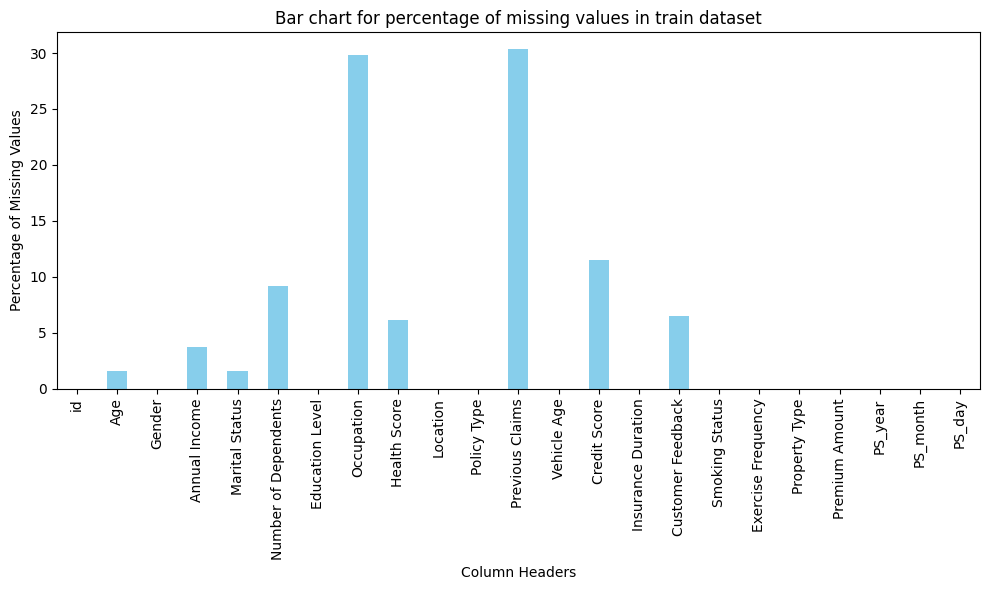

In [16]:
rows_with_empty_strings=(train_original=="").any(axis=1)
rows_with_empty_strings_test=(test_original=="").any(axis=1)

count_rows_with_empty_strings=rows_with_empty_strings.sum()
print(f"Number of rows with missing data in train set: {count_rows_with_empty_strings}")

count_rows_with_empty_strings_test = rows_with_empty_strings_test.sum()
print(f"Number of rows with missing data in test set: {count_rows_with_empty_strings_test}")

empty_string_count=(train_original=="").sum()
empty_string_percentage=(empty_string_count/len(train_original))*100
plt.figure(figsize=(10, 6))  # Set the figure size
empty_string_percentage.plot(kind='bar', color='skyblue')
# Add labels and title
plt.xlabel('Column Headers')
plt.ylabel('Percentage of Missing Values')
plt.title('Bar chart for percentage of missing values in train dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
                    'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 
                    'Exercise Frequency', 'Property Type']
numerical_cols = ['id','Age','Annual Income','Number of Dependents','Health Score',
                  'Previous Claims','Vehicle Age','Credit Score','Insurance Duration',
                  'PS_year','PS_month','PS_day','Premium Amount']

In [18]:
columns_to_exclude=['id','Premium Amount']
X=train_original.drop(columns=columns_to_exclude)
y=train_original['Premium Amount']
y=pd.to_numeric(y)
y_transformed=np.log1p(y)
y_transformed=y_transformed.astype(str)
X_test=test_original.drop(columns='id')


In [32]:
train_pool = Pool(
    data=X,
    label=y_transformed,
    cat_features=categorical_cols
)

# Cross-validation
cv_results = cv(
    params={
        'iterations': 100,
        'learning_rate': 0.05,
        'depth': 8,
        'l2_leaf_reg':3,
        'loss_function': 'RMSE',
        'verbose': 1,
    },
    pool=train_pool,
    fold_count=2,
    shuffle=True,
    partition_random_seed=42,
    verbose=True
)
print("Cross-Validation Results:")
print(cv_results.tail(1))


Training on fold [0/2]
0:	learn: 6.3596816	test: 6.3590661	best: 6.3590661 (0)	total: 373ms	remaining: 36.9s
1:	learn: 6.0515098	test: 6.0509097	best: 6.0509097 (1)	total: 755ms	remaining: 37s
2:	learn: 5.7590578	test: 5.7584631	best: 5.7584631 (2)	total: 1.04s	remaining: 33.7s
3:	learn: 5.4817957	test: 5.4812091	best: 5.4812091 (3)	total: 1.33s	remaining: 31.9s
4:	learn: 5.2190116	test: 5.2184244	best: 5.2184244 (4)	total: 1.61s	remaining: 30.5s
5:	learn: 4.9699728	test: 4.9693993	best: 4.9693993 (5)	total: 1.89s	remaining: 29.7s
6:	learn: 4.7338122	test: 4.7332376	best: 4.7332376 (6)	total: 2.18s	remaining: 29s
7:	learn: 4.5100833	test: 4.5094968	best: 4.5094968 (7)	total: 2.4s	remaining: 27.6s
8:	learn: 4.2981477	test: 4.2975719	best: 4.2975719 (8)	total: 2.56s	remaining: 25.9s
9:	learn: 4.0975418	test: 4.0969875	best: 4.0969875 (9)	total: 2.77s	remaining: 24.9s
10:	learn: 3.9075639	test: 3.9070208	best: 3.9070208 (10)	total: 2.93s	remaining: 23.7s
11:	learn: 3.7280072	test: 3.72748

0:	learn: 1.0921402	total: 455ms	remaining: 22.3s
1:	learn: 1.0887753	total: 843ms	remaining: 20.2s
2:	learn: 1.0858407	total: 1.29s	remaining: 20.3s
3:	learn: 1.0830539	total: 1.67s	remaining: 19.2s
4:	learn: 1.0805591	total: 2.06s	remaining: 18.6s
5:	learn: 1.0783232	total: 2.45s	remaining: 17.9s
6:	learn: 1.0762483	total: 2.87s	remaining: 17.6s
7:	learn: 1.0745029	total: 3.24s	remaining: 17s
8:	learn: 1.0728534	total: 3.67s	remaining: 16.7s
9:	learn: 1.0713436	total: 4.05s	remaining: 16.2s
10:	learn: 1.0698953	total: 4.44s	remaining: 15.7s
11:	learn: 1.0685968	total: 4.81s	remaining: 15.2s
12:	learn: 1.0673774	total: 5.18s	remaining: 14.7s
13:	learn: 1.0663055	total: 5.57s	remaining: 14.3s
14:	learn: 1.0653217	total: 5.96s	remaining: 13.9s
15:	learn: 1.0644413	total: 6.33s	remaining: 13.5s
16:	learn: 1.0636647	total: 6.72s	remaining: 13s
17:	learn: 1.0629114	total: 7.11s	remaining: 12.6s
18:	learn: 1.0622457	total: 7.5s	remaining: 12.2s
19:	learn: 1.0615777	total: 7.89s	remaining: 1

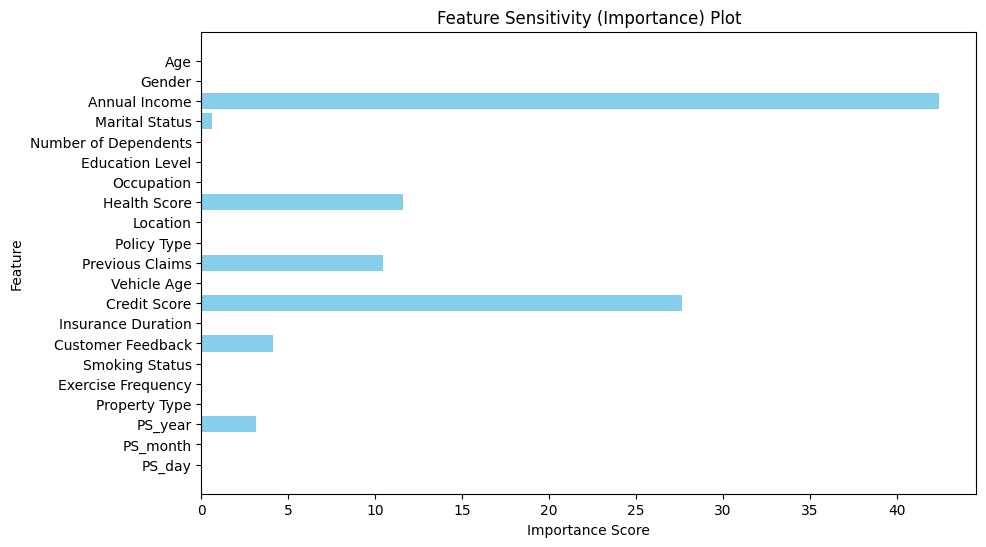

In [33]:
model = CatBoostRegressor(iterations=50, learning_rate=0.05, depth=8, l2_leaf_reg=3, verbose=1)
model.fit(train_pool)

# Feature importance
feature_importances = model.get_feature_importance(train_pool)
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Sensitivity (Importance) Plot")
plt.gca().invert_yaxis()
plt.show()

In [34]:
X_pred = test_original.drop(columns='id')

# Predict Premium Amount for test data
y_pred_transformed_Cat = model.predict(X_pred)
y_pred_Cat = np.expm1(y_pred_transformed_Cat) # Inverse of log1p
# Convert to DataFrame and assign a column name
y_pred = pd.DataFrame(y_pred_Cat, columns=['Premium Amount'])
    
# Write predicted values in the sample submission format
# Combine columns into a new DataFrame
submit_df = pd.concat([test_original['id'], y_pred['Premium Amount']], axis=1)
submit_df['Premium Amount'] = submit_df['Premium Amount'].round(3)

# Write to CSV
submit_df.to_csv('Submission_Harsh_Gujalwar.csv', index=False)